In [74]:
import ROOT as rt
# import root_numpy as rtnp
import csv
import re
import sys
import collections

from collections import OrderedDict
import uproot
import pandas as pd

import scipy
import awkward
import numpy as np
import time
import numba
from numba import jit
from matplotlib import pyplot as plt
sys.path.append('/storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/lib/')
from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph, make_ratio_plot

import CMS_lumi, tdrstyle
tdrstyle.setTDRStyle()
CMS_lumi.writeExtraText = 0

wH = 1
Z_MASS = 91.2


# donotdelete = []
print(sys.version)

3.6.8 (default, Aug  7 2019, 17:28:10) 
[GCC 4.8.5 20150623 (Red Hat 4.8.5-39)]


# Load ntuples

In [97]:
limitTrees =OrderedDict()
dataCards = OrderedDict()

limitTrees10 =OrderedDict()
dataCards10 = OrderedDict()

version = '/V1p15/v3/v4/'
OLD_CTAU = 1
methodA = True
nrechit = 130
bdt_name = 'bdt_flatten_metfilter_me1112nohits_eta2p1_testsize0p2_abs_EtaPhi_v2'
# limitDir = '/storage/user/christiw/login-1/christiw/LLP/CMSSW_10_2_13/src/HiggsAnalysis/MuonSystemLimit/combine/limitTrees/'+version
# dataCardDir = '/storage/user/christiw/login-1/christiw/LLP/CMSSW_10_2_13/src/HiggsAnalysis/MuonSystemLimit/combine/datacards/'+version
limitDir = '/storage/user/christiw/login-1/christiw/LLP/CMSSW_10_2_13/src/HiggsAnalysis/MuonSystemLimit/combine/limitTrees/'+version+'/'+bdt_name+'/'
dataCardDir = '/storage/user/christiw/login-1/christiw/LLP/CMSSW_10_2_13/src/HiggsAnalysis/MuonSystemLimit/combine/datacards/'+version+'/'+bdt_name+'/'
if methodA:
    limitDir+='methodA/'
    dataCardDir+='methodA/'
else:
    limitDir+='methodB/'
    dataCardDir+='methodB/'
lumi = 137000
# ctaus = np.array([5, 10, 30, 50, 100, 500, 1000, 5000, 10000])
# signal_norm = [0.21486444425582887, 0.8782269554138182, 12.492485580444336, 23.266965423583986, 40.29793115234375, 43.2841708984375]


ctaus = np.array([30, 40, 50, 100, 200, 300, 500, 1000, 2000, 3000, 5000, 10000, 20000, 30000, 50000, 100000, 200000, 300000, 500000, 1000000])
# ctaus = np.array([5, 10, 30, 40, 50, 100, 200, 300, 500, 1000, 5000, 10000, 100000])
# ctaus = np.array([100, 1000, 10000, 100000])
mass = np.array([15,40,55])
# assert(len(ctaus) == len(signal_norm))

### limit branch: 2.5, 16.0, 50.0, 84.0, 97.5, obs

for m in mass:
    limitTrees[m] = {}
    dataCards[m] = {}
    for ct in ctaus:
#     OLD_CTAU = 1
#     limitTrees[ct] = limitDir + 'higgsCombine.ctau'+str(OLD_CTAU)+'m_reweight_ctau' + str(ct) + 'cm_nRechit'+ str(nrechit)+ 'dPhi0p6.AsymptoticLimits.mH120.root'
#     dataCards[ct] = dataCardDir + 'ggh_mh125_mx55_ctau'+str(OLD_CTAU)+'m_reweight_' + str(ct) + 'cm_nRechit'+ str(nrechit)+ 'dPhi0p6.txt'
    
#     OLD_CTAU = 10
#     limitTrees10[ct] = limitDir + 'higgsCombine.ctau'+str(OLD_CTAU)+'m_reweight_ctau' + str(ct) + 'cm_nRechit'+ str(nrechit)+ 'dPhi0p6.AsymptoticLimits.mH120.root'
#     dataCards10[ct] = dataCardDir + 'ggh_mh125_mx55_ctau'+str(OLD_CTAU)+'m_reweight_' + str(ct) + 'cm_nRechit'+ str(nrechit)+ 'dPhi0p6.txt'
        limitTrees[m][ct] = limitDir + 'higgsCombine.ggh_mh125_mx'+str(m)+'_ctau'+str(ct)+'mm_nRechit'+ str(nrechit)+ 'dPhiCluster0p75.AsymptoticLimits.mH120.root'
        dataCards[m][ct] = dataCardDir + 'ggh_mh125_mx'+str(m)+'_ctau'+str(ct)+'mm_nRechit'+ str(nrechit)+ 'dPhiCluster0p75.txt'

        
norms = []
limits = {}
# higgsCombine.ggh_mh125_mx15_ctau100000mm_nRechit130dPhiCluster0p75.AsymptoticLimits.mH120.root
# higgsCombine.ggh_mh125_mx55_ctau100mm_nRechit130dPhi0p6.AsymptoticLimits.mH120.root'
for i,m in enumerate(limitTrees.keys()):
#     limits[m] = np.ones((len(ctaus), 6))

    for j, k in enumerate(limitTrees[m].keys()):

        T = uproot.open(limitTrees[m][k])['limit']
    #     T10 = uproot.open(limitTrees10[k])['limit']
        line = open(dataCards[m][k], "r").readline()
        signal_norm = float(line.split(" ")[3])
    #     line = open(dataCards10[k], "r").readline()
    #     signal_norm10 = float(line.split(" ")[3])

    #     if T.array('limit')[2]/signal_norm < T10.array('limit')[2]/signal_norm10:
    #         limit_temp = np.array(T.array('limit'))/signal_norm
    #         norms.append(signal_norm)
    #     else:
    #         limit_temp = np.array(T10.array('limit'))/signal_norm10
    #         norms.append(signal_norm10)
        limit_temp = np.array(T.array('limit'))/signal_norm
        norms.append(signal_norm)
    #     if float(k) <= 10:
    #         limit_temp = np.array(T.array('limit'))/signal_norm
    #         norms.append(signal_norm)

    #     else:
    #         limit_temp = np.array(T10.array('limit'))/signal_norm10
    #         norms.append(signal_norm10)

    #     limit_temp = np.array(T10.array('limit'))/signal_norm10
    #     norms.append(signal_norm10)

    
    
    
        if j == 0: limits[m] = limit_temp
        else: limits[m] = np.vstack((limits[m], limit_temp))
    limits[m] = np.array(limits[m])
print(ctaus)
print(limits[m][:,2])
print(limits[m][0])
print(norms)
#[0.00941727 0.00232179 0.00032019 0.0002337  0.00017991 0.00017472]



[     30      40      50     100     200     300     500    1000    2000
    3000    5000   10000   20000   30000   50000  100000  200000  300000
  500000 1000000]
[6.63578521e+08 2.45370490e+06 2.93037191e+04 1.51741520e+00
 1.65867422e-01 5.57914130e-02 1.38616880e-02 3.43266769e-03
 1.74085476e-03 1.39504475e-03 1.38203181e-03 1.87220303e-03
 2.95256932e-03 4.23830250e-03 6.55301265e-03 1.17948998e-02
 2.33876566e-02 3.80900623e-02 7.81833837e-02 2.42910885e-01]
[4.32881301e+08 5.24799725e+08 6.63578521e+08 8.72537623e+08
 1.15439074e+09 5.54758676e+08]
[28.182951003744492, 70.84042834199988, 128.9386610600268, 473.3509889245033, 1007.6559756994247, 1251.0954836010933, 1481.4396607875824, 1530.0237245559692, 1318.0612030029297, 1093.2821378707886, 806.1834344863892, 474.7686071395874, 278.8763146549463, 190.15253621339798, 120.0227153301239, 68.28678965568542, 34.772210240364075, 20.867579638957977, 9.787645921111107, 3.0266139917075634, 0.09627277218896779, 0.45675520435906947, 1.3

# load atlas limit

In [135]:
file_dir = '/storage/user/christiw/login-1/christiw/LLP/CMSSW_10_2_13/src/HiggsAnalysis/MuonSystemLimit/data/limits_others/'
ms1_40 = file_dir + 'atlas_mh125_mx40_ms1.csv'
ms2_40 = file_dir + 'atlas_mh125_mx40_ms2.csv'
id55 = file_dir + 'atlas_mh125_mx55_id.csv'
comb40 = file_dir + 'atlas_mh125_mx40_id_cr_ms2.csv'
jingyu = file_dir + 'jingyu_mh125_mx55_95p9ifb.csv'
ms_40 = file_dir + 'atlas_mh125_mx40_ms.csv'
ms_15 = file_dir + 'atlas_mh125_mx15_ms.csv'

ms_40 = np.genfromtxt(ms_40, delimiter=',')
ms_15 = np.genfromtxt(ms_15, delimiter=',')
ms1_40 = np.genfromtxt(ms1_40, delimiter=',')
ms2_40 = np.genfromtxt(ms2_40, delimiter=',')
id55 = np.genfromtxt(id55, delimiter=',')
comb40 = np.genfromtxt(comb40, delimiter=',')
jingyu = np.genfromtxt(jingyu, delimiter=',')
print(comb40.shape)

(130, 2)


# Plot

[3.e-02 4.e-02 5.e-02 1.e-01 2.e-01 3.e-01 5.e-01 1.e+00 2.e+00 3.e+00
 5.e+00 1.e+01 2.e+01 3.e+01 5.e+01 1.e+02 2.e+02 3.e+02 5.e+02 1.e+03]
56
[0.0632031  0.02536511 0.01399648 0.0038951  0.00193829 0.00159235
 0.00141332 0.00152673 0.00194414 0.00251536 0.00368247 0.00684544
 0.01075746 0.01651635 0.02851023 0.0556019  0.11368633 0.1916849
 0.41346765 1.34742158]
[1.77717693e+01 3.89979136e+00 1.34081102e+00 8.22878297e-02
 1.21373409e-02 5.56748823e-03 2.94210372e-03 1.69531695e-03
 1.28101319e-03 1.28170897e-03 1.48637383e-03 2.19687119e-03
 3.87473744e-03 5.87199439e-03 9.84072336e-03 1.94180925e-02
 3.73828393e-02 5.67194931e-02 1.05679220e-01 2.96683665e-01]
[6.63578521e+08 2.45370490e+06 2.93037191e+04 1.51741520e+00
 1.65867422e-01 5.57914130e-02 1.38616880e-02 3.43266769e-03
 1.74085476e-03 1.39504475e-03 1.38203181e-03 1.87220303e-03
 2.95256932e-03 4.23830250e-03 6.55301265e-03 1.17948998e-02
 2.33876566e-02 3.80900623e-02 7.81833837e-02 2.42910885e-01]
137.0 fb^{-1} (13 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


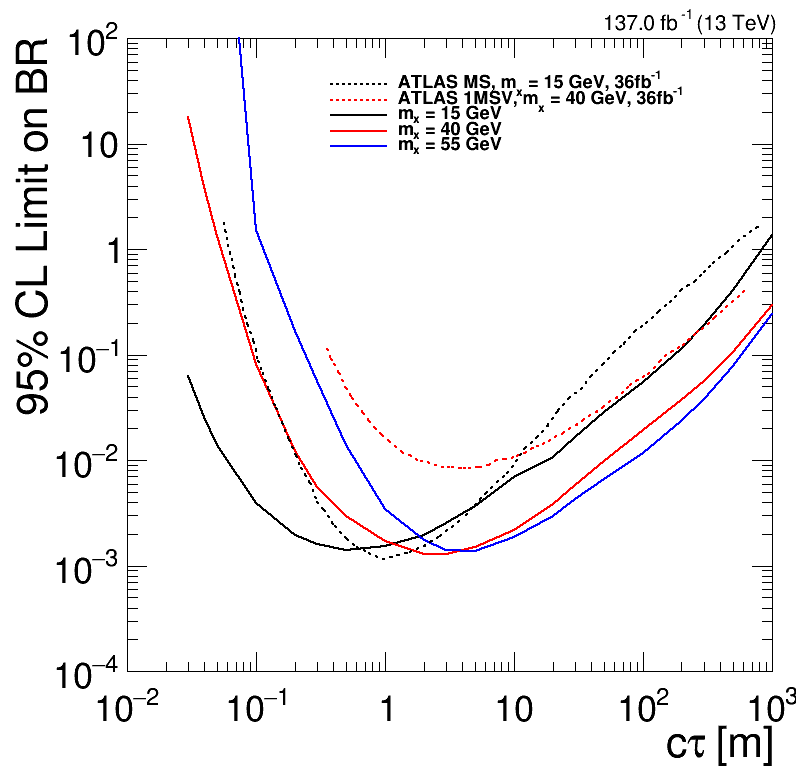

In [139]:
import importlib
importlib.reload(sys.modules['histo_utilities'])
from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph, make_ratio_plot
leg = rt.TLegend(0.4,0.80,0.8,0.9)
leg.SetTextSize(0.025)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)



c = rt.TCanvas('c','c', 800, 800)
# Plotting ncsc
start_t = time.time()

rt.gStyle.SetOptFit(1011)
# for i,k in enumerate(tree_bkg.keys()):
br = 1
ctaus_m = ctaus/1000
print(ctaus_m)
# print(limits[:,2])
h_others = {}
h = {}
h_exp1sig = {}
h_exp2sig = {}
h_others['ms_15'] = create_TGraph(ms_15[:,0],ms_15[:,1],  axis_title=['c#tau [m]', '95% CL Limit on BR'])
# h_others['ms_40'] = create_TGraph(ms_40[:,0],ms_40[:,1],  axis_title=['c#tau [m]', '95% CL Limit on BR'])
print(len(ms_15))
h_others['ms1_40'] = create_TGraph(ms1_40[:,0],ms1_40[:,1],  axis_title=['c#tau [m]', '95% CL Limit on BR'])
# h_others['ms2_40'] = create_TGraph(ms2_40[:,0],ms2_40[:,1],  axis_title=['c#tau [m]', '95% CL Limit on BR'])
# h_others['id55'] = create_TGraph(id55[:,0],id55[:,1],  axis_title=['c#tau [m]', '95% CL Limit on BR'])
# h_others['comb40'] = create_TGraph(comb40[:,0],comb40[:,1],  axis_title=['c#tau [m]', '95% CL Limit on BR'])
# h_others['jingyu'] = create_TGraph(jingyu[:,0],jingyu[:,1],  axis_title=['c#tau [m]', '95% CL Limit on BR'])
# leg.AddEntry(h_others['ms_40'], "ATLAS MS, m_{x} = 40 GeV, 36fb^{-1}", 'L')
leg.AddEntry(h_others['ms_15'], "ATLAS MS, m_{x} = 15 GeV, 36fb^{-1}", 'L')
leg.AddEntry(h_others['ms1_40'], "ATLAS 1MSV, m_{x} = 40 GeV, 36fb^{-1}", 'L')
# leg.AddEntry(h_others['ms2_40'], "ATLAS 2MSV, m_{x} = 40 GeV, 36fb^{-1}", 'L')
# leg.AddEntry(h_others['id55'], "ATLAS ID, m_{x} = 55 GeV, 36fb^{-1}", 'L')
# leg.AddEntry(h_others['comb40'], "ATLAS ID+CR+MS2, m_{x} = 40 GeV, 36fb^{-1}", 'L')
# leg.AddEntry(h_others['jingyu'], "CMS displaced jet, m_{x} = 55 GeV, 95.9fb^{-1}", 'L')

for i, m in enumerate(mass):
#     if not m == 15: continue
    print(limits[m][:,2])
    h[m] = create_TGraph(ctaus_m, limits[m][:,2],  axis_title=['c#tau [m]', '95% CL Limit on BR'])
    h_exp1sig[m] = create_TGraph(np.hstack((ctaus_m, np.flip(ctaus_m))), np.hstack((limits[m][:,1], np.flip(limits[m][:,3]))))
    h_exp2sig[m] = create_TGraph(np.hstack((ctaus_m, np.flip(ctaus_m))), np.hstack((limits[m][:,0], np.flip(limits[m][:,4]))))
#     leg.AddEntry(h[m], "Expected  95% CL upper limit", "L")
    leg.AddEntry(h[m], "m_{x} = "+str(m)+" GeV", "L")

#     leg.AddEntry(h_exp1sig[m], "#pm 1 #sigma Expected", 'F')
#     leg.AddEntry(h_exp2sig[m], "#pm 2 #sigma Expected", 'F')
    h_exp1sig[m].SetFillColor(std_color_list[3])
    h_exp2sig[m].SetFillColor(5)
    h[m].SetLineColor(std_color_list[i])
    h[m].SetLineWidth(2)
    h[m].GetXaxis().SetLimits(0.01,1000.0)
    h[m].GetYaxis().SetRangeUser(1e-4,100)
    h[m].GetXaxis().SetTitleOffset(1)


for i,m in enumerate(h.keys()):
#     if m == 15: continue
#     if m == 40:continue
    h[m].Draw('LA' if i == 0 else 'Lsame')
#     h_exp2sig[m].Draw('Fsame')
#     h_exp1sig[m].Draw('Fsame')
#     h[m].Draw('Lsame')
for i, k in enumerate(h_others.keys()): 
    h_others[k].SetLineWidth(2)
#     if i < 4:h_others[k].SetLineColor(std_color_list[i-1])
    h_others[k].SetLineColor(std_color_list[i])
    h_others[k].SetLineStyle(2)
#     h_others[k].SetLineColor(std_color_list[2])
#     h_others[k].Draw('Lsame')
# h_others['ms_40'].Draw('Lsame')
h_others['ms_15'].Draw('Lsame')

h_others['ms1_40'].Draw('Lsame')
# h_others['ms2_40'].Draw('Lsame')
# h_others['id55'].Draw('Lsame')
# h_others['comb40'].Draw('Lsame')
# h_others['jingyu'].Draw('Lsame')


    
CMS_lumi.lumi_13TeV = str(round(lumi/1000,2))+" fb^{-1}"
CMS_lumi.cmsText = ""
CMS_lumi.relPosY = 0.05
CMS_lumi.writeExtraText = False
CMS_lumi.CMS_lumi(c,4,4)



leg.Draw()
c.SetRightMargin(0.03)
c.SetLogy()
c.SetLogx()

c.Draw()
# print(time.time()-start_t)

# limit for different mass points

[3.e-02 4.e-02 5.e-02 1.e-01 2.e-01 3.e-01 5.e-01 1.e+00 2.e+00 3.e+00
 5.e+00 1.e+01 2.e+01 3.e+01 5.e+01 1.e+02 2.e+02 3.e+02 5.e+02 1.e+03]
137.0 fb^{-1} (13 TeV)
137.0 fb^{-1} (13 TeV)
137.0 fb^{-1} (13 TeV)


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file ggH_m15_limitPlot_cluster.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file ggH_m40_limitPlot_cluster.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file ggH_m55_limitPlot_cluster.png has been created


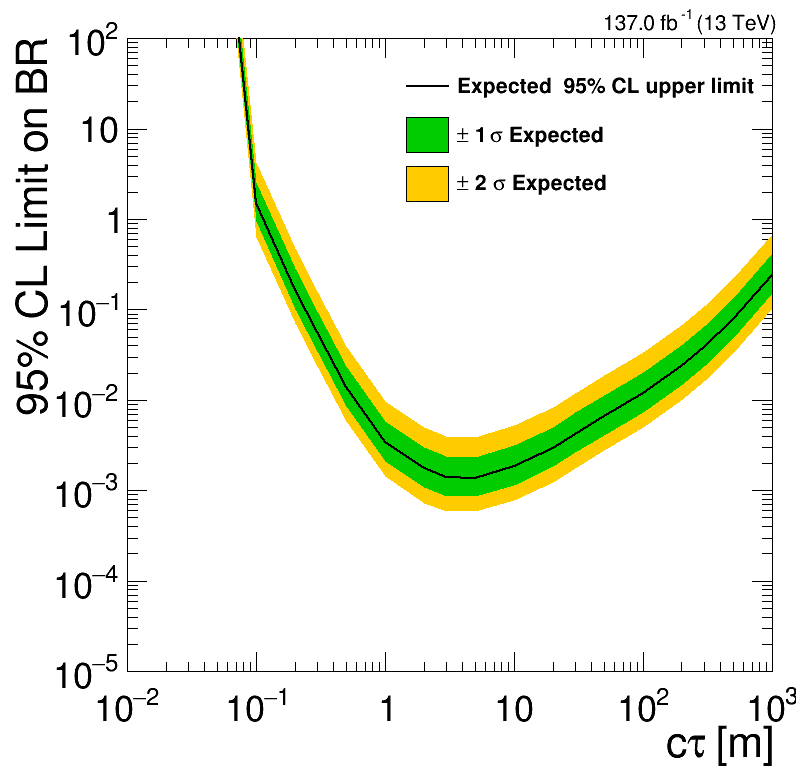

In [96]:
import importlib
importlib.reload(sys.modules['histo_utilities'])
from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph, make_ratio_plot



# Plotting ncsc
start_t = time.time()

rt.gStyle.SetOptFit(1011)
# for i,k in enumerate(tree_bkg.keys()):
br = 1
ctaus_m = ctaus/1000
print(ctaus_m)
# print(limits[:,2])
h_others = {}
h = {}
h_exp1sig = {}
h_exp2sig = {}

for m in mass:
# m = 55
    c = rt.TCanvas('c','c', 800, 800)
    leg = rt.TLegend(0.5,0.73,0.80,0.92)
    leg.SetTextSize(0.03)
    leg.SetBorderSize(0)
    leg.SetEntrySeparation(0.01)

    h[m] = create_TGraph(ctaus_m, limits[m][:,2],  axis_title=['c#tau [m]', '95% CL Limit on BR'])
    h_exp1sig[m] = create_TGraph(np.hstack((ctaus_m, np.flip(ctaus_m))), np.hstack((limits[m][:,1], np.flip(limits[m][:,3]))))
    h_exp2sig[m] = create_TGraph(np.hstack((ctaus_m, np.flip(ctaus_m))), np.hstack((limits[m][:,0], np.flip(limits[m][:,4]))))
    leg.AddEntry(h[m], "Expected  95% CL upper limit", "L")
    leg.AddEntry(h_exp1sig[m], "#pm 1 #sigma Expected", 'F')
    leg.AddEntry(h_exp2sig[m], "#pm 2 #sigma Expected", 'F')
    h[m].SetLineColor(std_color_list[0])
    h[m].SetLineWidth(2)
    h_exp1sig[m].SetFillColor(417)
    h_exp2sig[m].SetFillColor(800)
    h[m].GetXaxis().SetLimits(0.01,1000.0)
    h[m].GetYaxis().SetRangeUser(1e-5,100)
    h[m].GetXaxis().SetTitleOffset(1)

    h[m].Draw('LA')
    h_exp2sig[m].Draw( 'Fsame')
    h_exp1sig[m].Draw('Fsame')
    h[m].Draw('Lsame')



    CMS_lumi.lumi_13TeV = str(round(lumi/1000,2))+" fb^{-1}"
    CMS_lumi.cmsText = ""
#     CMS_lumi.relPosY = 0.05
#     CMS_lumi.relPosX = 0.1

    CMS_lumi.writeExtraText = 0
#     CMS_lumi.extraText = "Preliminary"
    CMS_lumi.CMS_lumi(c,4,4)
    CMS_lumi.lumi_sqrtS = "13 TeV" # used with iPeriod = 0, e.g. for simulation-only plots (default is an empty string)


    # CMS_lumi.lumi_7TeV = "4.8 fb^{-1}"
    # CMS_lumi.lumi_8TeV = "18.3 fb^{-1}"
    # CMS_lumi.writeExtraText = 1
    # CMS_lumi.extraText = "Preliminary"

    leg.Draw()
    c.SetRightMargin(0.03)
    c.SetLogy()
    c.SetLogx()

    c.Draw()
    c.SaveAs('ggH_m'+str(m)+'_limitPlot_cluster.png')
# print(time.time()-start_t)

# limit for different nrechits

##### load ntuples

In [76]:
limitTrees =OrderedDict()
dataCards = OrderedDict()
version = '/V1p14/v1/v1/'
OLD_CTAU = 10 #m
bdt_name = 'bdt_flatten_metfilter_me1112nohits_eta2p1_testsize0p2_abs_EtaPhi_v2'
methodA = True
dphi = 'dPhiCluster0p75'
# NEW_CTAU = 60 #cm
limitDir = '/storage/user/christiw/login-1/christiw/LLP/CMSSW_10_2_13/src/HiggsAnalysis/MuonSystemLimit/combine/limitTrees/'+version+'/'+bdt_name+'/'
dataCardDir = '/storage/user/christiw/login-1/christiw/LLP/CMSSW_10_2_13/src/HiggsAnalysis/MuonSystemLimit/combine/datacards/'+version+'/'+bdt_name+'/'
if methodA:
    limitDir+='methodA/'
    dataCardDir+='methodA/'
else:
    limitDir+='methodB/'
    dataCardDir+='methodB/'
    
nRechits = np.arange(60,170,10)
ctaus = np.array([5, 10, 30, 40, 50, 100, 200, 300, 500, 1000, 5000, 10000, 20000, 50000, 100000])
# ctaus = np.array([100, 300, 500, 1000, 10000])

print(nRechits)
limits = np.ones((len(ctaus),len(nRechits), 6))

for i, NEW_CTAU in enumerate(ctaus):
#     if not NEW_CTAU == 100:continue
    ### limit branch: 2.5, 16.0, 50.0, 84.0, 97.5, obs
#     print(str(NEW_CTAU))
    for j,nRechit in enumerate(nRechits):
        limitTrees[str(nRechit)] = limitDir + 'higgsCombine.ctau'+str(OLD_CTAU)+'m_reweight_ctau' + str(NEW_CTAU) + 'cm_nRechit'+str(nRechit)+dphi+'.AsymptoticLimits.mH120.root'
        dataCards[str(nRechit)] = dataCardDir + 'ggh_mh125_mx55_ctau'+str(OLD_CTAU)+'m_reweight_' + str(NEW_CTAU) + 'cm_nRechit'+str(nRechit)+dphi+'.txt'
    for j,k in enumerate(limitTrees.keys()):
        root_dir = uproot.open(limitTrees[k]) 
        T = root_dir['limit']
        text_file = open(dataCards[k], "r")
        line = text_file.readline()
        signal_norm = float(line.split(" ")[3])
        limits[i,j] = np.array(T.array('limit'))/signal_norm
#         print(i,j, limits[i,j])
#         if i == 0: limits[i] = np.array(T.array('limit'))/signal_norm
#         else: limits[i] = np.vstack((limits[i], T.array('limit')/signal_norm))
    #     print("signal_norm",signal_norm)
#     limits = np.array(limits)
#     print(str([round(i, 5) for i in limits[:,2]])[1:-1])
    
#     result = nRechits[np.where(limits[:,2] == np.amin(limits[:,2]))]
#     print(NEW_CTAU, "nRechits cut with minimum limit: ", result)
#[0.00941727 0.00232179 0.00032019 0.0002337  0.00017991 0.00017472]
# print(limits.shape)
for i in limits[:,:,2]:
    print(str([round(j,5) for j in i])[1:-1])



[ 60  70  80  90 100 110 120 130 140 150 160]
4408.6542, 4224.96053, 3790.77487, 3306.49085, 2989.20133, 2404.72062, 2221.02668, 2120.82999, 1887.03771, 1745.09239, 1607.32194
1.71778, 1.64621, 1.47703, 1.28834, 1.16471, 0.93697, 0.8654, 0.82636, 0.73526, 0.68646, 0.62953
0.01843, 0.01762, 0.01586, 0.01445, 0.01303, 0.01056, 0.00999, 0.00952, 0.00921, 0.00938, 0.00861
0.01075, 0.01026, 0.00927, 0.00859, 0.00776, 0.00636, 0.00613, 0.00579, 0.00577, 0.00602, 0.00553
0.00804, 0.00758, 0.00683, 0.00643, 0.00581, 0.0048, 0.00468, 0.00441, 0.00444, 0.00467, 0.00428
0.0056, 0.00516, 0.00459, 0.0043, 0.00393, 0.0033, 0.00329, 0.00306, 0.0031, 0.00318, 0.00293
0.00675, 0.00666, 0.00571, 0.00526, 0.00482, 0.00403, 0.00403, 0.00379, 0.00381, 0.00379, 0.00351
0.00867, 0.00899, 0.00756, 0.0069, 0.00638, 0.00528, 0.00526, 0.00499, 0.00499, 0.00494, 0.00458
0.01266, 0.0138, 0.01136, 0.01038, 0.00964, 0.00798, 0.00784, 0.00745, 0.00739, 0.00736, 0.0068
0.02343, 0.02709, 0.02171, 0.01994, 0.01869, 0.01

#### plot limit vs. nrechit

nRechits cut with minimum limit:  [160]
nRechits cut with minimum limit:  [160]
nRechits cut with minimum limit:  [160]
nRechits cut with minimum limit:  [160]
nRechits cut with minimum limit:  [160]


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


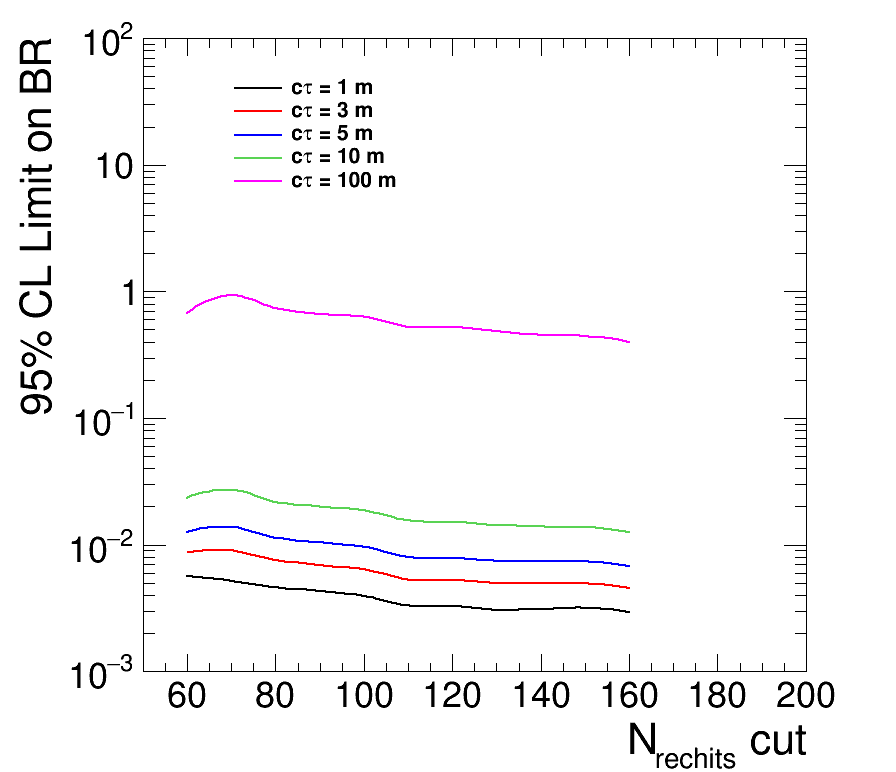

In [62]:
import importlib
importlib.reload(sys.modules['histo_utilities'])
from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph, make_ratio_plot
leg = rt.TLegend(0.25,0.75,0.55,0.90)
leg.SetTextSize(0.03)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)



c = rt.TCanvas('c','c', 900, 800)
# Plotting ncsc
start_t = time.time()

rt.gStyle.SetOptFit(1011)
h = {}
h_exp2sig = {}
h_exp1sig = {}

for i, ct in enumerate(ctaus):

#     print(limits[i,2])
#     print(limits[i,:,2])
    h[ct] = create_TGraph(nRechits, limits[i,:,2],  axis_title=['N_{rechits} cut', '95% CL Limit on BR'])
#     h_exp1sig = create_TGraph(np.hstack((nRechits, np.flip(nRechits))), np.hstack((limits[:,1], np.flip(limits[:,3]))))
#     h_exp2sig = create_TGraph(np.hstack((nRechits, np.flip(nRechits))), np.hstack((limits[:,0], np.flip(limits[:,4]))))
    leg.AddEntry(h[ct], 'c#tau = '+str(int(int(ct)/100))+' m', "L")
#     leg.AddEntry(h_exp1sig, "#pm 1 #sigma Expected", 'F')
#     leg.AddEntry(h_exp2sig, "#pm 2 #sigma Expected", 'F')

#     h_exp1sig.SetFillColor(std_color_list[3])
#     h_exp2sig.SetFillColor(5)
    h[ct].SetLineColor(std_color_list[i])
    h[ct].SetLineWidth(2)

    h[ct].Draw('ac' if i == 0 else 'c')

    h[ct].GetXaxis().SetLimits(50,200)
    h[ct].GetYaxis().SetRangeUser(1e-3,100)
    h[ct].GetXaxis().SetTitleOffset(1)

#     h_exp2sig.Draw('Fsame')
#     h_exp1sig.Draw('Fsame')
#     h.Draw('Lsame')

    result = nRechits[np.where(limits[i,:,2] == np.amin(limits[i,:,2]))]
    print("nRechits cut with minimum limit: ", result)




leg.Draw()
c.SetRightMargin(0.1)
c.SetLogy()
# c.SetLogx()

c.Draw()
# print(time.time()-start_t)

# create datacard

# check correlation

## Distribution for event level variables in different binnings

# Roc curve for event level variables

# Data plot

In [ ]:
import importlib
importlib.reload(sys.modules['histo_utilities'])
from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph, make_ratio_plot
leg = rt.TLegend(0.5,0.80,0.90,0.90)

leg.SetTextSize(0.03)
leg.SetBorderSize(0)

leg.SetEntrySeparation(0.01)
c = rt.TCanvas('c','c', 800, 800)
# Plotting ncsc
start_t = time.time()

legend = {}
legend['data_oot'] = 'Data OOT region'
legend['data_intime'] = 'Data in-time region'
legend['mc_signal'] = 'signal MC in time'
legend['mc_intime'] = 'MC in-time background'
legend['mc_oot'] = 'MC OOT background'
legend['mc_bkg'] = 'QCD 50toInf background'




keys = ['data_intime','data_oot','mc_signal',]
keys = ['data_intime','mc_signal',]


h = {}
rt.gStyle.SetOptFit(1011)
# for i,k in enumerate(tree_bkg.keys()):
br = 1
for i,k in enumerate(keys):

#     if k == 'data_intime':
#         cond = nCsc_JetMuonVetoCluster0p4_Me1112Veto[k] < 200
        
#     else:
#         cond = np.ones(weight[k].shape, dtype=bool)
#     cond = np.logical_and(cond, jetMet_dPhiMin4[k]>0.25)
    if k == 'mc_signal':
        br = 1
    else: br = 1
#     if k == 'mc_background':br = 1
    bins = [50,0,1000]
    metcut = 200
    h[k] = create_TH1D( nCsc_JetMuonVetoCluster0p4_Me1112Veto[k][cond], axis_title=['N_{rechits}', 'Events'], name=k, binning=bins,weights = br*weight[k][cond])
    h[k].SetLineColor(std_color_list[i])
    print("weight",weight[k][0])
    leg.AddEntry(h[k], legend[k]+" (scaled)" if k == 'data_oot' else legend[k])
#     if k == 'mc_signal':
#         for i in range(h[k].GetNbinsX()):
#             s = 0.015*h[k].GetBinContent(i+1)
#             b = h['data_oot'].GetBinContent(i+1)
#             if s+b == 0:continue
#             sig = s/(s+b)**0.5
#             print(i,h[k].GetBinCenter(i+1),sig,s,b)
#             if sig < 1./100:
#                 print(i,sig)
#                 continue
#     h[k].SetMinimum(1)

#     r = h[k].Fit('expo', 'LRSQ+', '', 50,400)
#     print(r.Get())
#     print(r.Prob())
#     h[k].GetFunction("expo").SetLineColor(std_color_list[2])
#     h[k].GetFunction("expo").SetLineWidth(2)
    h[k].GetXaxis().SetLabelSize(0.04)
    h[k].SetMinimum(0.1)
    h[k].SetMaximum(10E6/2)
#     h[k+'met'].GetXaxis().SetLabelSize(0.02)
    if k == 'data_oot':
        scale = 1.0*h['data_intime'].GetBinContent(4)/h['data_oot'].GetBinContent(4)
#         for i in range(10):
#             print(1.0*h['data_intime'].GetBinContent(i+1)/h['data_oot'].GetBinContent(i+1))
        h[k].Scale(scale)
    if k[:4] == 'data':
        h[k].Draw('same E1')
    else:
        h[k].Draw("same hist")
#     h[k+'met'].DrawNormalized('same')
    

# c = make_ratio_plot([h['mc'],h['data']], fit = False, logy=True, in_tags = ["MC","Data"], ratio_bounds = [0,3])
c.SetRightMargin(0)
c.SetLogy()
leg.Draw()

c.Draw()
# print(time.time()-start_t)

In [ ]:
import importlib
importlib.reload(sys.modules['histo_utilities'])
from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph, make_ratio_plot
leg = rt.TLegend(0.5,0.80,0.90,0.90)

leg.SetTextSize(0.03)
leg.SetBorderSize(0)

leg.SetEntrySeparation(0.01)
c = rt.TCanvas('c','c', 800, 800)
# Plotting ncsc
start_t = time.time()


k = 'data_intime'

h = {}
rt.gStyle.SetOptFit(1011)

bins = [40,0,1000]
metcut = 200

# cscRechitClusterMaxChamber = {}
# cscRechitClusterNChamber = {}
# cscRechitClusterNStation = {}
# cscRechitClusterMaxStationRatio = {}
# cscRechitClusterMaxChamberRatio = {}

# h[k] = create_TH1D( cscRechitClusterMaxChamber[k], axis_title=['max chamber', 'Events'], name=k, binning=[200,-50,50])
h[k] = create_TH1D( cscRechitClusterMaxChamberRatio[k], axis_title=['max chamber ratio', 'Events'], name=k, binning=[20,0,1])
# h[k] = create_TH1D( cscClusterMet_dPhi[k], axis_title=['#Delta#phi(MET, cluster)', 'Events'], name=k, binning=[20,0,3.14])
# h[k] = create_TH1D( n_chamber[k], axis_title=['Number of Chambers', 'Events'], name=k, binning=[10,0,10])
# h[k] = create_TH1D( cscRechitClusterNStation[k], axis_title=['max station', 'Events'], name=k, binning=[5,0,5])
# print(cscRechitClusterMaxStationRatio[k])
# h[k] = create_TH1D( cscRechitClusterNStation[k], axis_title=['Number of station', 'Events'], name=k, binning=[20,0,10])


# h['1jet'].GetXaxis().SetLabelSize(0.04)
# h['1jet'].SetMinimum(0.1)
# h['1jet'].SetMaximum(10E6/2)

h[k].Draw('hist')


c.SetRightMargin(0)
c.SetLogy()

c.Draw()
# print(time.time()-start_t)

## significance

In [ ]:
start_t = time.time()
#ROC curve
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.35,0.80,0.85,0.92)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)

leg.SetEntrySeparation(0.01)

var = [nCsc_JetMuonVetoCluster0p4_Me1112Veto,]
name = ['nCsc_JetMuonVetoCluster0p4_Me1112Veto',]
legend = [ 'jet & muon veto + ME11/12 veto',]

bkg_k = 'data_oot'
sig_k = 'mc_signal'
br = 0.01

threshold = list(range(300))
threshold = np.array(list(range(2000)))
# print(threshold)
for i in range(len(var)):
    event_count = {}
    
    for k in ['data_oot','mc_signal']:
        event_count[k] = []
        for th in threshold:
            event_count[k].append(np.sum(weight[k][var[i][k]>th]))
        event_count[k] = np.array(event_count[k])
        if k == sig_k:
            event_count[k] = event_count[k]*br
    sig = event_count[sig_k]/np.sqrt(event_count[sig_k]+event_count[bkg_k])
    cond = event_count[sig_k]>0
    sig = sig[cond]
    ncsc = threshold[cond]
#     gr['bbbb'] = create_TGraph(eff_bkg,eff_sig,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    h[sig_k+str(i)] = create_TGraph(ncsc, sig,  axis_title=['N_{rechits}', 'Significnace'])
#     h[sig_k+str(i)] = create_TGraph(ncsc, event_count[sig_k],  axis_title=['N_{rechits}', 'Event Yield'])

    h[sig_k+str(i)].SetLineWidth(2)
    h[sig_k+str(i)].SetMarkerColor(std_color_list[i])
    h[sig_k+str(i)].SetLineColor(std_color_list[i])
    h[sig_k+str(i)].GetXaxis().SetRangeUser(0, 3000)
    h[sig_k+str(i)].GetXaxis().SetLabelSize(0.04)

#     h[sig_k+str(i)].GetYaxis().SetRangeUser(0, 3)


    leg.AddEntry(h[sig_k+str(i)],sig_k+" "+legend[i])
    h[sig_k+str(i)].Draw('ac' if i == 0 else 'c')

#     h[sig_k+str(i)].Draw('ac' if i==0 else 'c')
#     gr['bbbb'].Draw('')




# c.SetLogy()
c.Draw()
# c.SaveAs('../plots/timing_studies/compare_timing_definition_ROC.png')

print(time.time()-start_t)


# 2d plot

In [ ]:
# Plotting ncsc
start_t = time.time()
c = rt.TCanvas('c','c', 1000, 800)
h = {}
# leg = rt.TLegend(0.50,0.75,0.97,0.93)
leg = rt.TLegend(0.58,0.70,0.94,0.85)
leg.SetTextSize(0.022)
# leg.SetTextFont(42)
leg.SetEntrySeparation(0.01)

i = 0
k = 'data_intime'

# h[k] = create_TH2D(np.column_stack((angle[k][cond],jetPt[k][cond][:,0])), axis_title = ['\Delta\phi (jet,met)','jet p_{T}[GeV]','Events'], binning=[80,-3.14,3.14,100,0,2000])
h[k] = create_TH2D(np.column_stack(( nCsc_JetMuonVetoCluster0p4_Me1112Veto[k], dphiMet_cluster[k])),
                   axis_title = ['N_{rechits}','\Delta\phi (cluster,met)','Events'], binning=[50,0,600,50,0,3.14])
h[k] = create_TH2D(np.column_stack(( nCsc_JetMuonVetoCluster0p4_Me1112Veto[k], jetMet_dPhiMin4[k])),
                   axis_title = ['N_{rechits}','min_{4jet}\Delta\phi (jet,met)','Events'], binning=[50,0,600,50,0,3.14])


h[k].GetXaxis().SetLabelSize(0.04)




h[k].SetLineColor(std_color_list[i])
# leg.AddEntry(h[k], k)
#     h[k].SetMaximum(10E5)
#     h[k].SetMinimum(1)
h[k].Draw('colz')
c.SetRightMargin(0.2)



# if setlog: 
c.SetLogz()
c.Draw()
print(time.time()-start_t)

# third

# ROC Curve

# 4th

# nCsc histogram

# event yield vs. ncsc

# significance